In [1]:
import tokenizer
import pickle
import pandas as pd
import numpy as np
import glob
import os
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
import json
import sparse_matrix_functions
import scipy.sparse as scs
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = '/Users/ale/Dropbox (Yadlin Family)/galvanize/capstone/*.txt'

In [3]:
with open("gene_dictionary_final.pickle", "rb") as dict_gene:
        gene_dict = pickle.load(dict_gene)

In [4]:
gene_keys = set(gene_dict.keys())
gene_values = set(gene_dict.values())

In [5]:
gene_dict['her2']

'#erbb2#'

In [6]:
with open("drug_dictionary_final.pickle", "rb") as dict_drug:
        drug_dict = pickle.load(dict_drug)

In [7]:
drug_keys = set(drug_dict.keys())
drug_values = set(drug_dict.values())

In [8]:
drug_dict['lapatinib']

'#lapatinib#'

In [9]:
'#doxorubicin hydrochloride#' in drug_values

False

In [10]:
drug_dict['acridine carboxamide']

'#acridine#'

In [11]:
with open("greek_alphabet.pickle", "rb") as dict_greek:
        greek_dict = pickle.load(dict_greek)

In [12]:
import data_frame_creator
import sparse_matrix_functions

In [13]:
test=data_frame_creator.sparse_create_data_frame(path, short_list=True, min_df=0)

In [14]:
vocab_matrix =test[0]
vocab_matrix[vocab_matrix>1]=1
vocab_columns = test[1]
doc_names = test[2] 
orig_sentences =test[3]

In [15]:
col_idx=sparse_matrix_functions.column_indexing(vocab_columns)

In [19]:
'#lapatinib#'in vocab_columns

True

In [20]:
test_matrix_all = sparse_matrix_functions.pick_network_type(vocab_matrix, vocab_columns,kind='a')

In [21]:
test_matrix_all

<2892x398 sparse matrix of type '<class 'numpy.float64'>'
	with 5640 stored elements in Compressed Sparse Row format>

In [22]:
test_matrix_r = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,'r')

In [23]:
test_matrix_s = sparse_matrix_functions.pick_network_type(vocab_matrix,vocab_columns,kind='s')

In [24]:
vocab_matrix

<2892x399 sparse matrix of type '<class 'numpy.int64'>'
	with 2930 stored elements in Compressed Sparse Row format>

In [25]:
test_matrix_r

<135x398 sparse matrix of type '<class 'numpy.int64'>'
	with 428 stored elements in Compressed Sparse Row format>

In [26]:
type(test_matrix_s)

scipy.sparse.csr.csr_matrix

In [ ]:
non_empty_rows = sparse_matrix_functions.non_zero_rows(vocab_matrix)

In [ ]:
sentences = [orig_sentences[i] for i in non_empty_rows]

In [ ]:
files = [doc_names[i] for i in non_empty_rows]

In [ ]:
vocab_mat_clean=sparse_matrix_functions.remove_zero_rows(vocab_matrix)

In [ ]:
vocab_mat_clean

In [ ]:
vocab_matrix.shape

In [ ]:
print(list(vocab_matrix[:,vocab_columns.index('sensit')].indices))

In [ ]:
sensit2

In [27]:
network_genes=sparse_matrix_functions.get_network_rows(vocab_columns)

In [28]:
network_drugs =sparse_matrix_functions.get_network_columns(vocab_columns)

In [29]:
network_drugs

{0: '#afuresertib#',
 1: '#akt inhibitor gsk2141795#',
 2: '#akt inhibitor mk2206#',
 3: '#alisertib#',
 4: '#alpelisib#',
 5: '#anastrozole#',
 6: '#bevacizumab#',
 7: '#binimetinib#',
 8: '#broxuridine#',
 9: '#buparlisib#',
 10: '#capecitabine#',
 11: '#carbendazim#',
 12: '#carboplatin#',
 13: '#cetuximab#',
 14: '#cisplatin#',
 15: '#cixutumumab#',
 16: '#clofarabine#',
 17: '#cyclophosphamide#',
 18: '#dacarbazine#',
 19: '#dalotuzumab#',
 20: '#daunorubicin#',
 21: '#dexamethasone#',
 22: '#docetaxel#',
 23: '#doxorubicin#',
 24: '#epirubicin#',
 25: '#erlotinib#',
 26: '#everolimus#',
 27: '#exemestane#',
 28: '#fluorouracil#',
 29: '#folitixorin#',
 30: '#fulvestrant#',
 31: '#gemcitabine#',
 32: '#hydroxyurea#',
 33: '#infliximab#',
 34: '#iproplatin#',
 35: '#lapatinib#',
 36: '#lenalidomide#',
 37: '#letrozole#',
 38: '#leucovorin calcium#',
 39: '#mek inhibitor ci-1040#',
 40: '#menogaril#',
 41: '#methotrexate#',
 42: '#mitoxantrone#',
 43: '#mtor kinase inhibitor cc-223#

In [30]:
resist_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_r, vocab_columns)

In [31]:
pairs_r, counts_r = sparse_matrix_functions.extract_gene_drug_pairs(resist_network_matrix, network_genes, network_drugs)

In [32]:
original_indeces_r = sparse_matrix_functions.back_to_original_indeces(pairs_r, col_idx)

In [33]:
resist_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7, test, original_indeces_r)

In [34]:
resist_evidence_akt_lapatinib

[('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).')]

In [35]:
sensit_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_s, vocab_columns)

In [36]:
pairs_s, counts_s = sparse_matrix_functions.extract_gene_drug_pairs(sensit_network_matrix, network_genes, network_drugs)

In [37]:
#(pairs_s,counts_s)

In [38]:
original_indeces_s = sparse_matrix_functions.back_to_original_indeces(pairs_s, col_idx)

In [39]:
sensit_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences(
    'akt','lapatinib','r',7,test, original_indeces_s)

In [40]:
sensit_evidence_akt_lapatinib

'There is no evidence that the prensece of the gene akt confers resistance to the drug lapatinib'

In [41]:
all_network_matrix = sparse_matrix_functions.make_network_matrix(test_matrix_all, vocab_columns)

In [42]:
pairs_a, counts_a = sparse_matrix_functions.extract_gene_drug_pairs(all_network_matrix, network_genes, network_drugs)

In [43]:
original_indeces_a = sparse_matrix_functions.back_to_original_indeces(pairs_a, col_idx)

In [44]:
all_evidence_akt_lapatinib = sparse_matrix_functions.get_evidence_sentences('akt','lapatinib','a',7, 
                                                                               test, original_indeces_a)

Returning evidence of both sensitivity and resistant


/Users/ale/anaconda3/lib/python3.6/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [45]:
all_evidence_akt_lapatinib

[('test.txt',
  'In BT474 and MCF10A breast cancer cells transfected with the construct encoding HER2-T798M mutation, elevated HER2 kinase activity was detected and lapatinib did not block phosphorylation of HER2, EGFR3 or downstream Akt and ERK1 2.'),
 ('test.txt',
  'Treatment of the lapatinib-resistant HER2+ cells with Src inhibitors suppressed the PI3K PTEN Akt mTOR pathway as well as  Figure 5: Sites of Targeting the EGFR PI3K PTEN Akt mTORC Pathway with Small Molecule Membrane-Permeable Inhibitors and Monoclonal Antibodies (MoAbs).'),
 ('test.txt',
  'I  Recurrent BC, -Stage IV BC, Active, not MK2206, paclitaxel Not Unspecified Adult recruiting Provided Solid Tumor Triciribine (an Akt inhibitor), Not paclitaxel, provided doxorubicin, cyclophosphamide Cisplatin, 0941, a inhibitor GDCNot PI3K provided  I  II  Metastatic Carcinoma Stage IV  BC, Currently Breast recruiting participants  I II  ER- BC, HER- BC, TNBC, Recurrent Currently BC, Stage IV BC recruiting participants  II  HER2

In [ ]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(M,r):
    nmf = NMF(n_components=r)
    nmf.fit(M)
    W = nmf.transform(M)
    H = nmf.components_
    return nmf.reconstruction_err_

error = [fit_nmf(resist_network_matrix,i) for i in range(1,10)]
plt.plot(range(1,10), error)
plt.xticks(range(1, 10))
plt.xlabel('number of latent topics')
plt.ylabel('Reconstruction Error')

In [ ]:
# Fit using 2 hidden concepts
nmf = NMF(n_components=2)
nmf.fit(resist_network_matrix)
W = nmf.transform(resist_network_matrix)
H = nmf.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

In [ ]:
# Make interpretable
W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W,index=network_genes.values())
H = pd.DataFrame(H,columns=network_drugs.values())

display(W) 
display(H)

In [ ]:
resist_network_matrix

In [ ]:
type(resist_network_matrix)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(resist_network_matrix, test_size=0.33, random_state=42)

In [ ]:
nmf = NMF(n_components=6)
nmf.fit(x_train)
W = nmf.transform(x_test)
H = nmf.components_
print('RSS = %.2f' % nmf.reconstruction_err_)

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
rom sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

In [46]:
def process_genes():
    genes = input('what genes?')
    gene_list=genes.split(', ')
    processed_gene_list = []
    for id in gene_list:
        try: 
            gene_dict[id]
            processed_gene_list.append(gene_dict[id])
        except KeyError:
            print("Gene: {} not in list".format(id)) 
    return processed_gene_list

In [47]:
inverse_network_genes = dict((v, k) for k, v in network_genes.items())

In [48]:
inverse_network_drugs = dict((v, k) for k, v in network_drugs.items())

In [49]:
inverse_network_genes['#akt1#']

8

In [50]:
inverse_network_drugs['#trastuzumab#']

66

In [51]:
def extract_gene_drug_interaction(kind='a'):
    genes_list = process_genes()
    if kind == 'r' or kind =='R':
        X = resist_network_matrix
    elif kind == 's' or kind =='S':
        X = sensit_network_matrix
    else:
        X = all_network_matrix
    interaction_dict={}
    genes =[]
    for gene in genes_list:
        multiplier = np.zeros((X.shape[0],1))
        idx = inverse_network_genes[gene]
        multiplier[idx]=1
        value = X.T.dot(multiplier) 
        drug_idx = value.nonzero()[0]
        if sum(value) == 0:
            print('\n no drug interactions with gene {} were found in our database'.format(gene))
        else:
            #interaction_dict[gene] = value
            drug_idx = value.nonzero()[0]
            for idx in drug_idx:
                interaction_dict[gene, network_drugs[idx]]=value[idx,0]
            genes.append(gene)
    print('\nthese are the genes for whihc interactions with drugs were found:',genes )
    return interaction_dict
            
            
        
        
        

In [82]:
b=extract_gene_drug_interaction(kind='r')

what genes?mtor

these are the genes for whihc interactions with drugs were found: ['#mtor#']


In [83]:
b

{('#mtor#', '#bevacizumab#'): 1.0,
 ('#mtor#', '#capecitabine#'): 1.0,
 ('#mtor#', '#carbendazim#'): 1.0,
 ('#mtor#', '#cisplatin#'): 1.0,
 ('#mtor#', '#dacarbazine#'): 1.0,
 ('#mtor#', '#docetaxel#'): 1.0,
 ('#mtor#', '#doxorubicin#'): 1.0,
 ('#mtor#', '#erlotinib#'): 1.0,
 ('#mtor#', '#everolimus#'): 1.0,
 ('#mtor#', '#fluorouracil#'): 1.0,
 ('#mtor#', '#lapatinib#'): 1.0,
 ('#mtor#', '#lenalidomide#'): 1.0,
 ('#mtor#', '#letrozole#'): 1.0,
 ('#mtor#', '#leucovorin calcium#'): 1.0,
 ('#mtor#', '#oxaliplatin#'): 1.0,
 ('#mtor#', '#paclitaxel#'): 1.0,
 ('#mtor#', '#pi3k/mtor inhibitor bez235#'): 1.0,
 ('#mtor#', '#selumetinib#'): 1.0,
 ('#mtor#', '#sorafenib tosylate#'): 1.0,
 ('#mtor#', '#temsirolimus#'): 1.0,
 ('#mtor#', '#thalidomide#'): 1.0}

In [54]:
def gene_or_drug(vocabulary):
    gene_or_drug={}
    for item in vocabulary:
        if item in gene_values:
            gene_or_drug[item]='gene'
        if item in drug_values:
            gene_or_drug[item]='drug'
    return gene_or_drug

In [55]:
dg=gene_or_drug(vocab_columns)

In [57]:
dg['#lapatinib#']

'drug'

In [76]:
import networkx as nx

In [77]:
G=nx.Graph()

In [84]:
for k,v in b.items():
    print(k[0],k[1],v)
    G.add_edge(k[0],k[1],weight=v)

#mtor# #bevacizumab# 1.0
#mtor# #capecitabine# 1.0
#mtor# #carbendazim# 1.0
#mtor# #cisplatin# 1.0
#mtor# #dacarbazine# 1.0
#mtor# #docetaxel# 1.0
#mtor# #doxorubicin# 1.0
#mtor# #erlotinib# 1.0
#mtor# #everolimus# 1.0
#mtor# #fluorouracil# 1.0
#mtor# #lapatinib# 1.0
#mtor# #lenalidomide# 1.0
#mtor# #letrozole# 1.0
#mtor# #leucovorin calcium# 1.0
#mtor# #oxaliplatin# 1.0
#mtor# #paclitaxel# 1.0
#mtor# #pi3k/mtor inhibitor bez235# 1.0
#mtor# #selumetinib# 1.0
#mtor# #sorafenib tosylate# 1.0
#mtor# #temsirolimus# 1.0
#mtor# #thalidomide# 1.0


In [85]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]

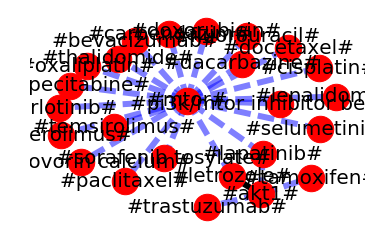

In [90]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display